In [8]:
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np   
import pandas as pd
import scipy as sp
import arc as arc

In [13]:
""" 
constants
"""
pi = np.pi
c = sp.constants.c
epsilon_0 = sp.constants.epsilon_0
hbar = sp.constants.hbar
h = sp.constants.h
e = sp.constants.e
u = sp.constants.physical_constants['atomic mass constant'][0]
kB = sp.constants.physical_constants['Boltzmann constant'][0]

# α/h [Hz/(V/m)2]=2.48832×10−8 α [a.u.] from https://arxiv.org/pdf/1507.06570.pdf
# α [a.u.] = 1.648 777 274 36 x 10-41 α [C2 m2 J-1] #https://physics.nist.gov/cgi-bin/cuu/Value?auepol
a_au = 1.64877727436*1e-41

I = 1/2 #nuclear spin
deltaE = 2*np.pi*12.6428121e9 #GHz the spliting of 171Yb+
Rinf = sp.constants.physical_constants['Rydberg constant times c in Hz'][0] 
au = sp.constants.physical_constants['atomic mass constant'][0] 

m_Yb174 = 173.938859*au #mass of 88Sr [kg] from NIST database
m_Yb171 = 170.936323*au #mass of 87Sr [kg] from NIST database

m_e = sp.constants.m_e*au #mass of electron [kg]
#electron reduced mass 
#(this would be a bit rigolus. to make it rigolas I should use ion mass?)
m174 = m_e*(m_Yb174-m_e)/m_Yb174
m171 = m_e*(m_Yb171-m_e)/m_Yb171

E0Yb = 2*np.pi*(50443.07074*con.c*1e-7)*1e9 #GHz (from NIST database ionization energy :50443.2 cm^-1)

Ryd = 109736.96959*con.c*1e2

In [21]:
class Ytterbium174B(arc.DivalentAtom):
    """
    Properties of Ytterbium 174 atoms
    """

    ionisationEnergycm = 50443.07074 # cm-1  ref. [#yb3]
    ionisationEnergy = ionisationEnergycm / 8065.544  # eV ref.

    Z = 70
    I = 0

    #: TODO source
    scaledRydbergConstant = 109736.627 * 1e2 * \
        sp.constants.physical_constants["inverse meter-electron volt relationship"][0]

    
    quantumDefect = [[[4.278337, -5.625, 91.65, -156050, -4.973e7, 1.102e10],
                      [3.95433, -12.33, 1729.0, 0.0, 0.0, 0.0],
                      [2.713094, -1.8646, -2145.5,  3940500, -3.1036e9, 1.0690e12],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9]],
                     [[1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [5.53658095, -1.62860818e3, 8.89586904e5, -2.56965006e8, 3.68075379e10, -2.05360653e12],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9]],
                     [[1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [3.35341176, 1.39820521e4, -5.21416397e7, 8.52192405e10, -6.58314910e13, -1.95529526e16],
                      [2.748679, -0.5200, -1186.01,  1564600, -9.8134e8, 2.426e11],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9]],
                     [[4.4382, 6.0, -1.8e4, 1.8e7, -7.0e9, 0.0],
                      [3.91038501, 4.44122338e1, -6.00452428e4, 2.91808081e7, -6.11071416e9, 4.59331291e11],
                     [2.729,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9]]]
    
    """ Contains list of modified Rydberg-Ritz coefficients for calculating
        quantum defects for
        [[ :math:`^1S_{0},^1P_{1},^1D_{2},^1F_{3}`],
        [ :math:`^3S_{0},^3P_{0},^3D_{1},^3F_{2}`],
        [ :math:`^3S_{0},^3P_{1},^3D_{2},^3F_{3}`],
        [ :math:`^3S_{1},^3P_{2},^3D_{3},^3F_{4}`]]."""

    #3S1: https://arxiv.org/pdf/1912.08754.pdf
    #1S0, 1D2, 3D2: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.98.062506?casa_token=pPBhrZ-7EEsAAAAA%3AcQenteyGZIEsoy3M2fF1vQLvwHpW_dPubroCIzQ1lgcilhoJnSoqsoSoDjNBNmiyfuk7opAa8Orsfw
    #1P1: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.45.1732
    #3P0,1,2: https://iopscience.iop.org/article/10.1088/0022-3700/17/18/006/pdf
    #3D3 : https://arxiv.org/pdf/2204.07995.pdf

    groundStateN = 6
    extraLevels = []  #: TODO unkown if such exist at time of writing

    #: Sources Refs. [#yb1]_, [#yb2]_, [#yb3]_
    levelDataFromNIST = "yb_level_data.csv"

    precalculatedDB = "yb_precalculated.db"
    dipoleMatrixElementFile = "yb_dipole_matrix_elements.npy"
    quadrupoleMatrixElementFile = "yb_quadrupole_matrix_elements.npy"

    literatureDMEfilename = 'ytterbium_literature_dme.csv'

    elementName = 'Yb174'
    meltingPoint = 819 + 273.15  #: in K

    #: Ref. [#nist]_
    mass = 173.9388664 * \
        sp.constants.physical_constants["atomic mass constant"][0]

    #: Quantum defect principal quantum number fitting ranges for different
    #: series
    defectFittingRange = {"1S0": [23, 80], "1P1": [39, 55], 
                          "1D2": [31, 80], "3D2": [28, 80], 
                          "3S1": [35, 80], "3P0": [19, 33],
                          "3P1": [34, 84], "3P2": [18, 93]}

In [22]:
#define atom for ARC
atom = Ytterbium174B()

This is to caliculate the 171 Yb energy structure including higpower fine structure. I will copy the method of Ding 2018 (https://arxiv.org/pdf/1808.05987.pdf). Arc is used for the $^{171}$Yb quantum defect data.

# Check $^{174}$Yb isotope quantum defect

ARC provides experimentally determined quantum defect data for $^{174}$Sr using multiple references. (https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/_modules/arc/divalent_atom_data.html#Strontium88.getPressure)

In [23]:
N=np.arange(30,100,1)

#quantum defect data import for 88Sr
Yb1S0_qd = atom.getQuantumDefect(N,l=0,j=0,s=0)
Yb3S1_qd = atom.getQuantumDefect(N,l=0,j=1,s=1)
Yb1P1_qd = atom.getQuantumDefect(N,l=1,j=1,s=0)
Yb1D2_qd = atom.getQuantumDefect(N,l=2,j=2,s=0)
Yb3D2_qd = atom.getQuantumDefect(N,l=2,j=2,s=1)

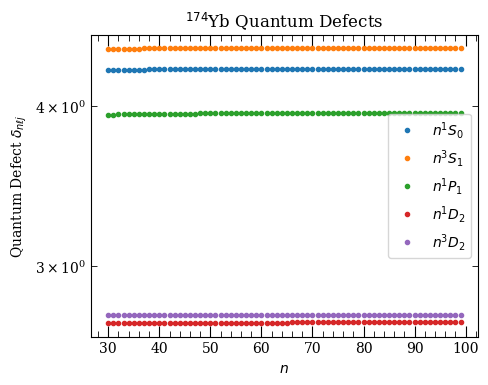

In [7]:
#plot
fig, axes = plt.subplots(1, 1, figsize=(5,4), dpi=100)

axes.semilogy(N,Yb1S0_qd,'.',label="$n{}^1S_{0}$")
axes.semilogy(N,Yb3S1_qd,'.',label="$n{}^3S_{1}$")
axes.semilogy(N,Yb1P1_qd,'.',label="$n{}^1P_{1}$")
axes.semilogy(N,Yb1D2_qd,'.',label="$n{}^1D_{2}$")
axes.semilogy(N,Yb3D2_qd,'.',label="$n{}^3D_{2}$")
axes.legend(loc=0)
axes.set_xlabel('$n$')
axes.set_ylabel('Quantum Defect $\delta_{n\ell j}$')
axes.set_title('$^{174}$Yb Quantum Defects')

plt.show()

using this, calculate the level structure (based on ARC's source code)

In [15]:
def Energy(m_r, n, l, j, s):
    return -(m_r/con.m_e)*Rinf / ((N[i] - Yb1S0_qd[i])**2)

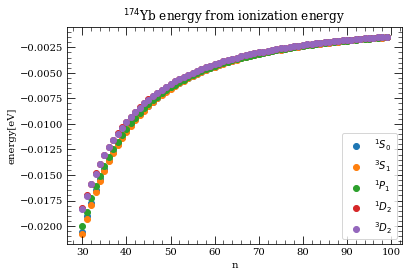

In [25]:
plt.scatter(N,Yb1S0_energy, label= '$^1S_0$ ')
plt.scatter(N,Yb3S1_energy, label= '$^3S_1$ ')
plt.scatter(N,Yb1P1_energy, label= '$^1P_1$ ')
plt.scatter(N,Yb1D2_energy, label= '$^1D_2$ ')
plt.scatter(N,Yb3D2_energy, label= '$^3D_2$ ')

plt.title('$^{174}$Yb energy from ionization energy')
plt.xlabel('n')
plt.ylabel('energy[eV]')

plt.legend()
plt.show()

# Convert $^{174}$Yb level to $^{171}$Yb $I=0$ energy level

I know there are no such atom but this is used as a initial hamiltonian, H_0(88,m87) in the reference

In [26]:
Yb1S0_energy = np.array(Yb1S0_energy)
Yb3S1_energy = np.array(Yb3S1_energy)
Yb1P1_energy = np.array(Yb1P1_energy)
Yb1D2_energy = np.array(Yb1D2_energy)
Yb3D2_energy = np.array(Yb3D2_energy)

#rescale reduced mass, adding ionization energy [eV]
Yb1S0_Energy_171 = E0Yb + m171/m174*Yb1S0_energy
Yb3S1_Energy_171 = E0Yb + m171/m174*Yb3S1_energy
Yb1P1_Energy_171 = E0Yb + m171/m174*Yb1P1_energy
Yb1D2_Energy_171 = E0Yb + m171/m174*Yb1D2_energy
Yb3D2_Energy_171 = E0Yb + m171/m174*Yb3D2_energy

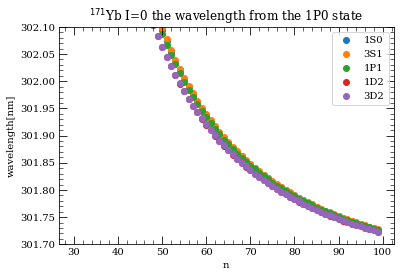

In [27]:
#plotting the wavelength from the 1P0 state
plt.scatter(N,con.c/(Yb1S0_Energy_171*241799-518295), label= '1S0')
plt.scatter(N,con.c/(Yb3S1_Energy_171*241799-518295),label = '3S1')
plt.scatter(N,con.c/(Yb1P1_Energy_171*241799-518295), label= '1P1')
plt.scatter(N,con.c/(Yb1D2_Energy_171*241799-518295),label = '1D2')
plt.scatter(N,con.c/(Yb3D2_Energy_171*241799-518295), label= '3D2')
plt.legend()
plt.title('$^{171}$Yb I=0 the wavelength from the 1P0 state')
plt.xlabel('n')
plt.ylabel('wavelength[nm]')
plt.ylim(301.7,302.1)
plt.show()

# Hamiltonian and diagonalization (ignoring intra coupling)

The hyperfine interaction matrix element between different n is small in the reference method.(eq. 12) I will first do the diagonalization neglecting this intra n coupling.

The basis order is
|1S0F=1/2>,|3S1F=1/2>,|3S1F=3/2>

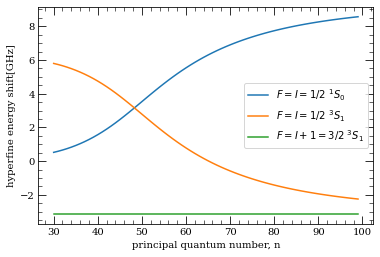

In [28]:
#This section is not yet completed especially the coupling constant is the value of Sr now
E171 = []
EnergyFI1S0_ig = np.zeros(len(N))
EnergyFI3S1_ig = np.zeros(len(N))
for i in range(len(N)):
    H = np.zeros((3,3))
    H[0,0] = Yb1S0_Energy_171[i]
    H[1,1] = Yb3S1_Energy_171[i] - 1/2*a 
    H[0,1] = H[1,0] = 1/2*a*np.sqrt(I*(I+1))
    
    w, v = np.linalg.eig(H)

    EnergyFI1S0_ig[i]=w[0]
    EnergyFI3S1_ig[i]=w[1]
    if i > 29:
        EnergyFI1S0_ig[i]=w[1]
        EnergyFI3S1_ig[i]=w[0]

    
    E171.append(w)
    
E171 = np.array(E171)
Id = np.full(np.shape(N),1)  
plt.plot(N,(EnergyFI1S0_ig - Yb1S0_Energy_171)*241799,label='$F=I=1/2 ~^1S_0$') #converting eV to GHz
plt.plot(N,(EnergyFI3S1_ig - Yb3S1_Energy_171)*241799,label='$F=I=1/2 ~^3S_1$')
plt.plot(N,(1/2*a*I )*Id*241799,label='$F=I+1=3/2 ~^3S_1$')

plt.legend()
plt.xlabel('principal quantum number, n')
plt.ylabel('hyperfine energy shift[GHz]')

plt.show()

# (Prelimionary) Hamiltonian and diagonalization (including intra coupling)

The hyperfine interaction matrix element between different n is small in the reference method.(eq. 12) I will first do the diagonalization neglecting this intra n coupling.

The basis order is
....,|n 1S0F=1/2>,|n 3S1F=1/2>,|n+1 1S0F=1/2>,|n+1 3S1F=1/2>,....

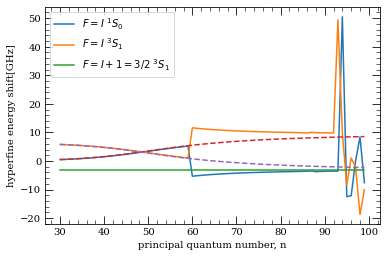

In [117]:
#This section is not yet completed especially the coupling constant is the value of Sr now
H = np.zeros((2*len(N),2*len(N)))
for i in range(len(N)):
    H[2*i,2*i] = Yb1S0_Energy_171[i]*241799
    H[2*i+1,2*i+1] = (Yb3S1_Energy_171[i] - 1/2*a)*241799 #GHz
    H[2*i,2*i+1] = H[2*i+1,2*i] = 1/2*a*np.sqrt(I*(I+1))*0.98*241799
    if i != 0:
        H[2*(i-1),2*i+1] = H[2*(i-1)+1,2*i] = H[2*i,2*(i-1)+1] = H[2*i+1,2*(i-1)] = 1/2*a*np.sqrt(I*(I+1))*0.1*241799

W, V = np.linalg.eig(H)
EnergyFI1S0 = np.zeros(len(N))
EnergyFI3S1 = np.zeros(len(N))
for j in range(2*len(N)):
    index = np.abs(V[j]).argmax()
    if index%2 == 0:
        EnergyFI1S0[index//2]=W[j]

    else:
        EnergyFI3S1[index//2]=W[j]
    
E171 = np.array(E171)
Id = np.full(np.shape(N),1)  
plt.plot(N,EnergyFI1S0-Yb1S0_Energy_171*241799,label='$F=I ~^1S_0$') #converting eV to GHz
plt.plot(N,EnergyFI3S1-Yb3S1_Energy_171*241799,label='$F=I ~^3S_1$')
plt.plot(N,(1/2*a*I )*Id*241799,label='$F=I+1=3/2 ~^3S_1$')

plt.legend()
plt.xlabel('principal quantum number, n')
plt.ylabel('hyperfine energy shift[GHz]')

plt.plot(N,(EnergyFI1S0_ig - Yb1S0_Energy_171)*241799,'--',label='ignoring intra n coupling $F=I ~^1S_0$') #converting eV to GHz
plt.plot(N,(EnergyFI3S1_ig - Yb3S1_Energy_171)*241799,'--',label='ignoring intra n coupling $F=I ~^3S_1$')

plt.show()